<div class="alert alert-info"> <b>
Проект по исследованию гипотез для увеличения выручки</b> 
    
Исходя из подготовленного, при участии отдела маркетинга, списка гипотез для увеличения выручки интернет-магазина необходимо
приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

Целью проекта является:

1. Проведение приоритезации гипотез с применением фреймворков ICE и RICE. Определение причин изменений в приоритезации при применении разных фреймворков.
2. Анализ А/В теста с определением динамики кумулятивной выручки и среднего чека по группам, аномальных заказов и статистической значимости различий в среднем количестве заказов и среднем чеке по сырым и очищенным данным.
3. Принять решение о победе одной из групп по результатам теста, отсутствии различий между ними либо о продолжении теста.
    
Для выполнения поставленных целей необходимо решить следующие задачи:
    
1. Построить и проанализировать графики кумулятивной выручки, кумулятивного среднего чека и кумулятивного среднего количества заказов по группам.
2. Посчитать 95-й и 99-й перцентили количества заказов и их стоимости на пользователя.
3. Определить статистическую значимость различий в среднем количестве заказов между группами по «сырым» и по «очищенным» данным.
4. Определить статистическую значимость различий в среднем чеке заказа между группами по «сырым» и по «очищенным» данным.


</div>

# 1 Приоритезация гипотез

В целях максимизации увеличения выручки проведем приоритезацию 9 гипотез.

Для этого выполним следующие задачи:
- Применим фреймворк ICE.
- Применим фреймворк RICE.
- Выясним, как изменилась приоритизация гипотез при применении RICE вместо ICE. Сделаем краткие выводы.

Импортируем необходимые для работы в рамках всего проекта библиотеки

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

# Предобработка данных

In [2]:
data = pd.read_csv('/datasets/hypothesis.csv', sep=',')
print (data)

                                          Hypothesis  Reach  Impact  \
0  Добавить два новых канала привлечения трафика,...      3      10   
1  Запустить собственную службу доставки, что сок...      2       5   
2  Добавить блоки рекомендаций товаров на сайт ин...      8       3   
3  Изменить структура категорий, что увеличит кон...      8       3   
4  Изменить цвет фона главной страницы, чтобы уве...      3       1   
5  Добавить страницу отзывов клиентов о магазине,...      3       2   
6  Показать на главной странице баннеры с актуаль...      5       3   
7  Добавить форму подписки на все основные страни...     10       7   
8  Запустить акцию, дающую скидку на товар в день...      1       9   

   Confidence  Efforts  
0           8        6  
1           4       10  
2           7        3  
3           3        8  
4           1        1  
5           2        3  
6           8        3  
7           8        5  
8           9        5  


In [3]:
# проверим типы данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
# поиск пропущенных значений
data.isna().sum()

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

In [5]:
# прочитаем гипотезы
data['Hypothesis'].unique()

array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

Заменим названия столбцов (приведение к нижнему регистру)

In [6]:
data.columns = data.columns.str.lower()
print(data)

                                          hypothesis  reach  impact  \
0  Добавить два новых канала привлечения трафика,...      3      10   
1  Запустить собственную службу доставки, что сок...      2       5   
2  Добавить блоки рекомендаций товаров на сайт ин...      8       3   
3  Изменить структура категорий, что увеличит кон...      8       3   
4  Изменить цвет фона главной страницы, чтобы уве...      3       1   
5  Добавить страницу отзывов клиентов о магазине,...      3       2   
6  Показать на главной странице баннеры с актуаль...      5       3   
7  Добавить форму подписки на все основные страни...     10       7   
8  Запустить акцию, дающую скидку на товар в день...      1       9   

   confidence  efforts  
0           8        6  
1           4       10  
2           7        3  
3           3        8  
4           1        1  
5           2        3  
6           8        3  
7           8        5  
8           9        5  


**Применение фреймворка ICE для приоритизации гипотез**

In [7]:
data['ICE'] = (data['impact']*data['confidence'])/data['efforts']

In [8]:
data_ICE = data[['hypothesis', 'ICE']].sort_values(by='ICE', ascending = False)
print (data_ICE)

                                          hypothesis        ICE
8  Запустить акцию, дающую скидку на товар в день...  16.200000
0  Добавить два новых канала привлечения трафика,...  13.333333
7  Добавить форму подписки на все основные страни...  11.200000
6  Показать на главной странице баннеры с актуаль...   8.000000
2  Добавить блоки рекомендаций товаров на сайт ин...   7.000000
1  Запустить собственную службу доставки, что сок...   2.000000
5  Добавить страницу отзывов клиентов о магазине,...   1.333333
3  Изменить структура категорий, что увеличит кон...   1.125000
4  Изменить цвет фона главной страницы, чтобы уве...   1.000000


**Наиболее перспективные гипотезы:**

    - Акция со скидкой в ДР пользователя;
    - Добавление двух новых каналов привлечения трафика;
    - Добавление формы подписки в целях формирования БД клиентов для е-mail рассылки.

**Применение фреймворка RICE для приоритизации гипотез**

In [9]:
data['RICE'] = (data['reach']*data['impact']*data['confidence'])/data['efforts']

In [10]:
data_RICE = data[['hypothesis', 'RICE']].sort_values(by='RICE', ascending = False)
print (data_RICE)

                                          hypothesis   RICE
7  Добавить форму подписки на все основные страни...  112.0
2  Добавить блоки рекомендаций товаров на сайт ин...   56.0
0  Добавить два новых канала привлечения трафика,...   40.0
6  Показать на главной странице баннеры с актуаль...   40.0
8  Запустить акцию, дающую скидку на товар в день...   16.2
3  Изменить структура категорий, что увеличит кон...    9.0
1  Запустить собственную службу доставки, что сок...    4.0
5  Добавить страницу отзывов клиентов о магазине,...    4.0
4  Изменить цвет фона главной страницы, чтобы уве...    3.0


**Наиболее перспективные гипотезы:**

    - Добавление формы подписки в целях формирования БД клиентов для е-mail рассылки;
    - Добавление блоков рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
    - Добавление двух новых каналов привлечения трафика.

# Промежуточный краткий вывод:

Изменения в проритезации гипотез с использованием фреймворков ICE и RICE связано с применением в RICE параметра охвата пользователей (reach). 

Так, нампример, гипотеза "Добавление формы подписки в целях формирования БД клиентов для е-mail рассылки" в фреймворке RICE на 1-ом месте, т.к. ее параметр reach равен 10. В фреймворке ICE эта гипотеза по приоритету занимает 3-е место.

# 2 Анализ A/B теста

# Предобработка данных

**работа с таблицей "orders"**

In [11]:
orders = pd.read_csv('/datasets/orders.csv', sep = ',')
print (orders)

      transactionId   visitorId        date  revenue group
0        3667963787  3312258926  2019-08-15     1650     B
1        2804400009  3642806036  2019-08-15      730     B
2        2961555356  4069496402  2019-08-15      400     A
3        3797467345  1196621759  2019-08-15     9759     B
4        2282983706  2322279887  2019-08-15     2308     B
...             ...         ...         ...      ...   ...
1192     2662137336  3733762160  2019-08-14     6490     B
1193     2203539145   370388673  2019-08-14     3190     A
1194     1807773912   573423106  2019-08-14    10550     A
1195     1947021204  1614305549  2019-08-14      100     A
1196     3936777065  2108080724  2019-08-15   202740     B

[1197 rows x 5 columns]


In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [13]:
# изменение типов данных:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [15]:
#переименуем столбцы:
orders = orders.rename(
    columns={'transactionId': 'transaction_id','visitorId': 'visitor_id'})

In [16]:
print (orders.head())

   transaction_id  visitor_id       date  revenue group
0      3667963787  3312258926 2019-08-15     1650     B
1      2804400009  3642806036 2019-08-15      730     B
2      2961555356  4069496402 2019-08-15      400     A
3      3797467345  1196621759 2019-08-15     9759     B
4      2282983706  2322279887 2019-08-15     2308     B


In [17]:
# проверим наличие пропущенных значений:
orders.isna().sum()

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

In [18]:
# поиск строк-дубликатов:
orders.duplicated().sum()

0

**работа с таблицей "visitors"**

In [19]:
visitors = pd.read_csv('/datasets/visitors.csv', sep = ',')
print (visitors)

          date group  visitors
0   2019-08-01     A       719
1   2019-08-02     A       619
2   2019-08-03     A       507
3   2019-08-04     A       717
4   2019-08-05     A       756
..         ...   ...       ...
57  2019-08-27     B       720
58  2019-08-28     B       654
59  2019-08-29     B       531
60  2019-08-30     B       490
61  2019-08-31     B       718

[62 rows x 3 columns]


In [20]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [21]:
# изменение типов данных:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [22]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [23]:
# проверим наличие пропущенных значений:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [24]:
# поиск строк-дубликатов:
visitors.duplicated().sum()

0

**Проверим количество посетителей сайта в двух группах**

In [25]:
ordersA = orders[orders['group']=='A']
len(ordersA)

557

In [26]:
ordersA

,transaction_id,visitor_id,date,revenue,group
2,2961555356,4069496402,2019-08-15,400,A
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
10,3649131742,879864040,2019-08-15,4008,A
12,2809384911,3213223594,2019-08-15,7370,A
...,...,...,...,...,...
1187,2274188238,132143192,2019-08-14,750,A
1188,1692103379,1022829655,2019-08-14,112,A
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


In [27]:
# создаем Series
ordersB = orders[orders['group']=='B']['visitor_id']
len(ordersB)

640

In [28]:
ordersB

0       3312258926
1       3642806036
3       1196621759
4       2322279887
5        935554773
           ...    
1189     393266494
1190    1197745035
1191     608641596
1192    3733762160
1196    2108080724
Name: visitor_id, Length: 640, dtype: int64

Разница в числе посетителей в разрезе групп = 14,9%.

Проверим, какое количество человек попало в обе группы (и есть ли такие вообще).

In [29]:
double_client = ordersA.query("visitor_id in @ordersB")['visitor_id']
len(double_client)

89

В итоге у нас 89 человек, попавших в тесте и в группу А и в группу В. Исключим их из анализа.

In [30]:
# общее количество пользователей
orders.shape[0]

1197

In [31]:
# количество клиентов, принявщих участие в А и В сегменте без дублирования
orders = orders.query('visitor_id not in @double_client')
len(orders)

1016

In [32]:
print('Число участников group A: ', len(orders[orders['group']=='A']))
print('Число участников group B: ', len(orders[orders['group']=='B']))
print('Разница в численности: ', '{0:.2%}'.format(1 - len(orders[orders['group']=='A'])/len(orders[orders['group']=='B'])))

Число участников group A:  468
Число участников group B:  548
Разница в численности:  14.60%


В итоге в группе В на 14,6% больше участников теста.

# Анализ A/B теста

**1. Построим график кумулятивной выручки по группам**

In [33]:
# массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

In [34]:
# Соберём агрегированные кумулятивные по дням данные о заказах:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transaction_id' :'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [35]:
# Получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [36]:
# объединяем кумулятивные данные в одной таблице:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']


In [37]:
print(cumulativeData.head(15))

         date group  orders  buyers  revenue  visitors
0  2019-08-01     A      23      19   142779       719
1  2019-08-01     B      17      17    59758       713
2  2019-08-02     A      42      36   234381      1338
3  2019-08-02     B      40      39   221801      1294
4  2019-08-03     A      66      60   346854      1845
5  2019-08-03     B      54      53   288850      1803
6  2019-08-04     A      77      71   388030      2562
7  2019-08-04     B      68      66   385740      2573
8  2019-08-05     A      99      92   474413      3318
9  2019-08-05     B      89      87   475648      3280
10 2019-08-06     A     114     104   515332      3985
11 2019-08-06     B     112     109   690490      3935
12 2019-08-07     A     130     120   638580      4629
13 2019-08-07     B     135     132   909654      4644
14 2019-08-08     A     144     133   727219      5239


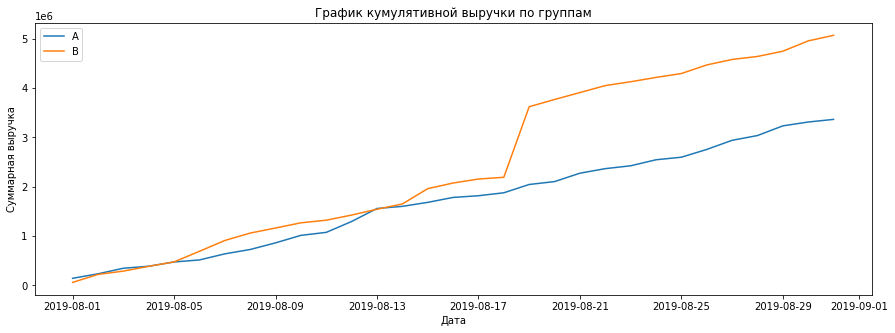

In [69]:
# строим график по группам:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.ylabel('Суммарная выручка')
plt.xlabel('Дата')
plt.title('График кумулятивной выручки по группам')
plt.show()


- График выручки группы А практически равномерно увеличивается в течение всего теста, что является положительным фактором.
- График выручки группы В в отдельный период имеет резкую тенденцию к росту.Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. 

**2. Построим график кумулятивного среднего чека по группам**

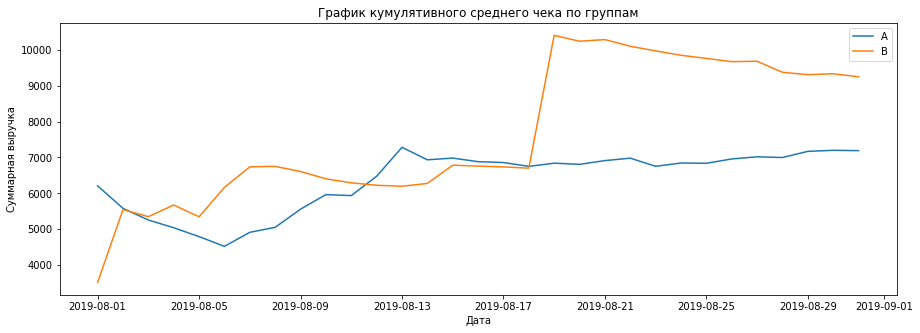

In [72]:
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.ylabel('Суммарная выручка')
plt.xlabel('Дата')
plt.title('График кумулятивного среднего чека по группам')
plt.show()

 - Средний чек группы А становится равномерным к ближе к концу теста. Ближе к началу теста заметен резкий всплеск на графике, возможно в группу А в начале теста попали крупные заказы.
 
 - Средний чек группы В продолжает падать к концу теста. Примерно в середине теста заметен резкий всплеск на графике - вероятнно такая же ситуация как и с группой А: в группу В в середине теста попали крупные заказы.

**3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A**

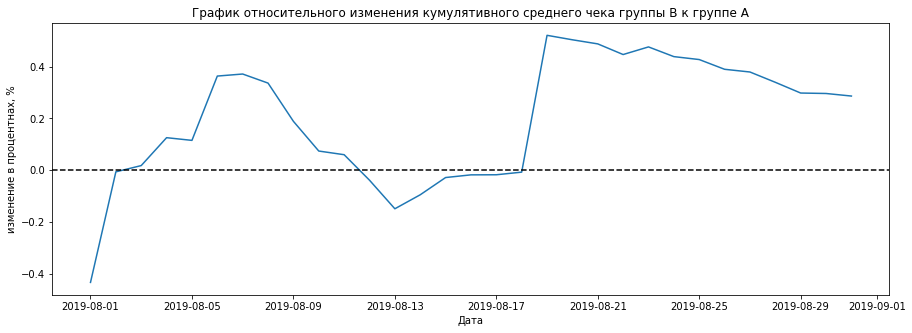

In [74]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.ylabel('изменение в процентнах, %')
plt.xlabel('Дата')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.show()

Результаты теста значительно меняются в ряд временных промежутков. Вероятно из-за совершения аномально крупных заказов.

**4. Построим график кумулятивного среднего количества заказов по группам**

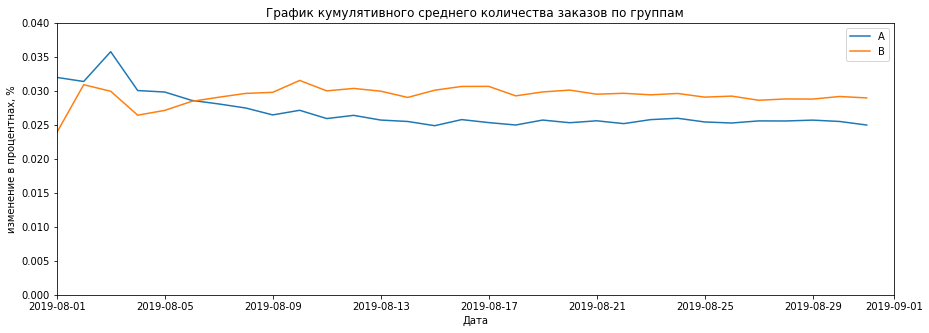

In [77]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.figure(figsize=(15,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.04])
plt.ylabel('изменение в процентнах, %')
plt.xlabel('Дата')
plt.title('График кумулятивного среднего количества заказов по группам')
plt.show()

Конверсия сегмента А в первые дни августа имела большую конверсию. Конверсия сегмента В вырвалась вперед и ближе к концу теста стабилизировалась (как и конверсия сегмента А). Абсолютное значение колебания конверсии небольшое: от приблизительно 2.5% до 3.4%.

**5. Построим график относительного изменения кумулятивного среднего количества заказов группы B к группе A**

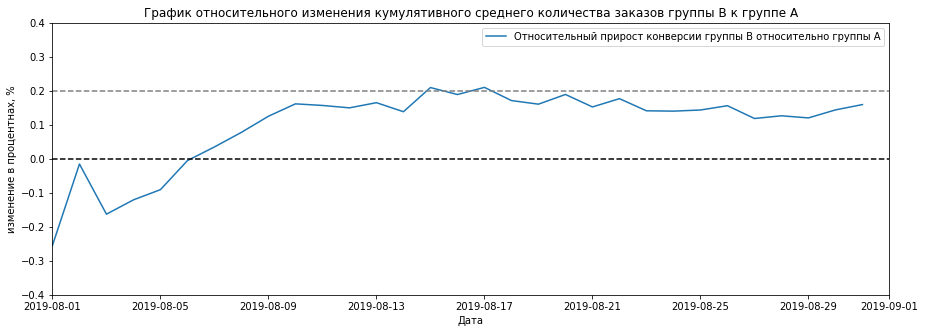

In [80]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis([dt.datetime.strptime('2019-08-01', '%Y-%m-%d'), dt.datetime.strptime('2019-09-01', '%Y-%m-%d'), -0.4, 0.4])
plt.ylabel('изменение в процентнах, %')
plt.xlabel('Дата')
plt.title('График относительного изменения кумулятивного среднего количества заказов группы B к группе A')
plt.show()

Практически с самого начала теста группа В лидирует по конверсии, допуская крактовременные "проигрыши" сегменту А. Большая часть колебаний конверсии идет в 20% прироста отноcительно сегмента А.

**6. Построим точечный график количества заказов по пользователям**

In [43]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']

In [44]:
print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

         userId  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2


Есть пользователи, которые совершали по 3 и 2 заказа.

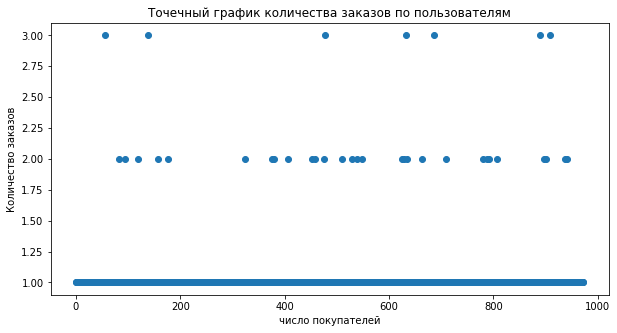

In [85]:
plt.figure(figsize=(10,5))
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values,ordersByUsers['orders'])
plt.ylabel('Количество заказов')
plt.xlabel('число покупателей')
plt.title('Точечный график количества заказов по пользователям')
plt.show()

Большая часть покупателей заказывала 1-2 раза. Так же есть заказы, совершенные  3 раза - они вполне могут быть аномальными. Нужно посчитать их долю.

**7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя**

In [46]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[1. 2.]


Не более 5% пользователей совершали более 1 заказа и не более 1% пользователей совершали более 2 заказов.

**8. Построим точечный график стоимостей заказов**

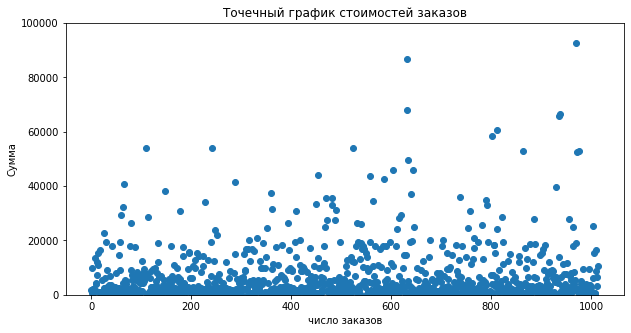

In [87]:
plt.figure(figsize=(10,5))
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.ylim(0, 100000)
plt.ylabel('Сумма')
plt.xlabel('число заказов')
plt.title('Точечный график стоимостей заказов')
plt.show()

In [48]:
orders['revenue'].sort_values(ascending = False)

425     1294500
1196     202740
1136      92550
744       86620
743       67990
         ...   
404          70
933          60
584          50
756          50
459          50
Name: revenue, Length: 1016, dtype: int64

Есть два аномально больших заказа: на 202 740 руб. и на 1 294 500 руб.

**9. Посчитаем 95-й и 99-й перцентили стоимости заказов** 

In [49]:
print(np.percentile(orders['revenue'],[90, 95,99]))

[17990. 26785. 53904.]


Не более 5% пользователей заказывают товары дороже 26 785 руб. Не более 1% пользователей заказывают товары дороже 53 904 руб. Заказы свышее 28000 руб. можно считать аномальными. Не более 10% пользователей позволяют себе покупки свыше 17 990 руб.

**10. Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным**

Сформулируем гипотезы:

**Нулевая**: различий в среднем количестве заказов между группами нет. 

**Альтернативная**: различия в среднем между группами есть.

In [50]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              23           142779              17   
1 2019-08-02              19            91602              23   
2 2019-08-03              24           112473              14   
3 2019-08-04              11            41176              14   
4 2019-08-05              22            86383              21   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0            59758                  23               142779   
1           162043                  42               234381   
2            67049                  66               346854   
3            96890                  77               388030   
4            89908                  99               474413   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  17                59758               719   
1                  40               221801               619   
2                  54               28

In [91]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value:', "{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Различие в средних:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


p-value: 0.01102
Различие в средних: 0.160


Вывод: По «сырым» данным различия в среднем числе заказов групп A и B имеются. Вероятно, одним из объяснений является большее число клиентов в сегменте В, выявленное в начале анализа.

p-value=0.01102 меньше 0.05 - значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем.

относительный выигрыш группы B равен 16.0%

**11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным**

Нулевая гипотеза: различий в среднем чеке между группами нет. 

Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [92]:
print('p-value:', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Различие в средних:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.829
Различие в средних: 0.287


P-value больше 0.05. Причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 

Средний чек группы B выше среднего чека группы A.

В нашем случае, когда в данных есть выбросы, как правило, применяются непараметрические критерии, в частности критерий Манна-Уитни для проверки, что распределения двух выборок не отличаются. Следовательно мы использовали критерий Манна-Уитни.

**12. Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным**

Найденные в прошлых заданиях 95-й и 99-й перцентили средних чеков равны 26 785 и 53 904 рублям. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 1 и 2 заказам на пользователя.

Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 30 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 1 — usersWithManyOrders и пользователей, совершивших заказы дороже 30 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.

In [53]:
# Узнаем, сколько всего аномальных пользователей
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 1]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 1]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
928     204675465
33      249864742
684     358944393
36      366673373
dtype: int64
77


Всего 77 аномальных пользователей.

In [54]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [94]:
print('p-value', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Различие в средних:''{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value 0.013
Различие в средних:0.180


Результаты по среднему количеству заказов практически не изменились.

p-value=0.013, меньше 0.05 - значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем.

относительный выигрыш группы B равен 18.0%

**13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным**

In [95]:
print('p-value',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value 0.829
-0.011


P-value неизменный, разница между сегментами сократилась с 28% до -1%

Средний чек группы B стал меньше среднего чека группы A. Убрали аномально дорогие заказы и заказы более 2 ед.

В результате проведенного исследования была проведена приоритезация 9 гипотез.

Выполнены следующие задачи:
- Применен фреймворк ICE.
- Применен фреймворк RICE.
- Выяснено, как изменилась приоритизация гипотез при применении RICE вместо ICE

Определено, что наиболее перспективными гипотезами по ICE являются:

- Акция со скидкой в ДР пользователя;
- Добавление двух новых каналов привлечения трафика;
- Добавление формы подписки в целях формирования БД клиентов для е-mail рассылки.

Наиболее перспективные гипотезы по RICE:

- Добавление формы подписки в целях формирования БД клиентов для е-mail рассылки;
- Добавление блоков рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
- Добавление двух новых каналов привлечения трафика.

**В ИТОГЕ** изменения в проритезации гипотез с использованием фреймворков ICE и RICE связано с применением в RICE параметра охвата пользователей (reach).

Так, нампример, гипотеза "Добавление формы подписки в целях формирования БД клиентов для е-mail рассылки" в фреймворке RICE на 1-ом месте, т.к. ее параметр reach равен 10. В фреймворке ICE эта гипотеза по приоритету занимает 3-е место.


При проведении анализа А/В теста проведена предлбработка данных:
в таблицах orders И visitors изменен тип данных столбца date, проведен анализ пропущенных значений и дубликатов.
Также проведен анализ клиентов, попавших в тесте и в группу А и в группу В. Они были исключены из анализа.

При анализа  графика  кумулятивной выручки по группам определено, что:

- График выручки группы А практически равномерно увеличивается в течение всего теста, что является положительным фактором.
- График выручки группы В в отдельный период имеет резкую тенденцию к росту.Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

При анализа графика кумулятивного среднего чека по группам определено, что:
- Средний чек группы А становится равномерным к ближе к концу теста. Ближе к началу теста заметен резкий всплеск на графике, возможно в группу А в начале теста попали крупные заказы.
- Средний чек группы В продолжает падать к концу теста. Примерно в середине теста заметен резкий всплеск на графике - вероятнно такая же ситуация как и с группой А: в группу В в середине теста попали крупные заказы.

Определено, что конверсия сегмента А в первые дни августа имела большую конверсию. Конверсия сегмента В вырвалась вперед и ближе к концу теста стабилизировалась (как и конверсия сегмента А). Абсолютное значение колебания конверсии небольшое: от приблизительно 2.5% до 3.4%.

Также, практически с самого начала теста группа В лидирует по конверсии, допуская крактовременные "проигрыши" сегменту А. Большая часть колебаний конверсии идет в 20% прироста отноcительно сегмента А.


Выявлено, что большая часть покупателей заказывала 1-2 раза. Так же есть заказы, совершенные 3 раза. Не более 5% пользователей совершали более 1 заказа и не более 1% пользователей совершали более 2 заказов. Не более 5% пользователей заказывают товары дороже 26 785 руб. Не более 1% пользователей заказывают товары дороже 53 904 руб. Заказы свышее 28000 руб. можно считать аномальными. Не более 10% пользователей позволяют себе покупки свыше 17 990 руб.



Определено, что по «сырым» данным различия в среднем числе заказов групп A и B имеются. Вероятно, одним из объяснений является большее число клиентов в сегменте В, выявленное в начале анализа.

p-value=0.01102 меньше 0.05 - значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем.

относительный выигрыш группы B равен 16.0%


Также, по сырым данным причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.

Средний чек группы B выше среднего чека группы A.


В целях анализа стат. значимости различий в среднем количестве заказов и в среднем чеке по группа было принято следующее решение: 

Найденные в прошлых заданиях 95-й и 99-й перцентили средних чеков равны 26 785 и 53 904 рублям. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 1 и 2 заказам на пользователя.

Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 30 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Таким образом определено 77 аномальных пользователей.

По очищенным данным результаты по среднему количеству заказов практически не изменились.

p-value=0.013, меньше 0.05 - значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем.

относительный выигрыш группы B равен 18.0%

Однако по очищенным данным разница между сегментами сократилась с 28% до -1%. Средний чек группы B стал меньше среднего чека группы A. Вероятно, вследствии того, что убрали аномально дорогие заказы и заказы более 2 ед.



<div class="alert alert-info">
   
В ИТОГЕ:
    
Есть статистически значимое различие по как по сырым так и по очищенным данным по среднему количеству заказов между группами.
По сырым данным нет статистически значимого различия по среднему чеку между группами. Однако после удаления аномалий статистически значимое различие есть.
    
По графику относительного изменения кумулятивного среднего количества заказов группы B к группе A мы видим, что результаты группы B лучше группы A: имеют тенденцию к росту, в отдельные периоды теста зафиксировались около среднего значения.
    
По графику относительного изменения кумулятивного среднего чека группы B к группе A мы видим, что график колеблется, он позволил  найти аномалии. Сделать из этого графика определённые выводы нельзя. В итоге нужно остановить тест, признать его успешным и признать победу группы В.
</div>